In [6]:
from BioLink.biolink_client import BioLinkWrapper
import pandas as pd
from pprint import pprint
from collections import defaultdict
from mygene import MyGeneInfo

In [7]:
# instantiate helpers
blw = BioLinkWrapper()
mg = MyGeneInfo()

In [8]:
def map_id(in_id):
    return blw.get_obj(obj_id=in_id)['id']

# Workflow 2 
## Fanconi Anemia implementation

## Module declaration

In [9]:
worklow_modules = [
    ('Mod1A', 'Mod1A Functional Similarity'),
    ('Mod1B', 'Mod1B Phenotype Similarity'),
    ('Mod1C', 'Mod1C Coexpression'),
    ('Mod1D', 'Mod1D Gene Chemical Interaction'),
    ('Mod1E', 'Mod1E Gene Interaction'),
    ('Mod3', 'Mod3 Candidate Merging')
]

## Workflow input

In [13]:
from Modules.Mod0_lookups import LookUp

# workflow input is a disease identifier
input_disease = ('MONDO:0019391') # Fanconi Anemia
lu = LookUp()
input_object = lu.input_object_lookup(input_curie=input_disease)
input_object

{'id': 'MONDO:0019391',
 'label': 'Fanconi anemia',
 'description': 'Fanconi anemia (FA) is a hereditary DNA repair disorder characterized by progressive pancytopenia with bone marrow failure, variable congenital malformations and predisposition to develop hematological or solid tumors.'}

# Mod0 Input Lookup
## Get Disease associated genes from BioLink API api.monarchinitative.org

In [15]:
# Module specification
mod0_config = {
    'id': input_object['id'],
    'data_type': 'disease',
    'input_type': {
        'complexity': 'single',
        'id_type': ['MONDO', 'DO', 'OMIM'],   
    },
    'output_type': {
        'complexity': 'set',
        'id_type': 'HGNC'
    },
    'taxon': 'human',
    'limit': None,
    'source': 'Monarch Biolink',
    'predicate': 'blm:gene associated with condition'
}

In [16]:
# get genes associated with disease from Biolink
disease_associated_genes = lu.disease_geneset_lookup(disease2genes_object=mod0_config)
# create list of gene curies for downstream module input
input_curie_set = disease_associated_genes['hit_id'].tolist()
# show the 
disease_associated_genes

,input_id,input_label,hit_id,hit_label,ncbi,sources
0,MONDO:0019391,Fanconi anemia,HGNC:1100,BRCA1,NCBIGene:672,clinvar
1,MONDO:0019391,Fanconi anemia,HGNC:1101,BRCA2,NCBIGene:675,"orphane, omim, ctd, orphane, clinvar"
2,MONDO:0019391,Fanconi anemia,HGNC:11892,TNF,NCBIGene:7124,ctd
3,MONDO:0019391,Fanconi anemia,HGNC:12829,XRCC2,NCBIGene:7516,"orphane, ctd, omim"
4,MONDO:0019391,Fanconi anemia,HGNC:20473,BRIP1,NCBIGene:83990,"ctd, orphane, omim, ctd, clinvar"
5,MONDO:0019391,Fanconi anemia,HGNC:20748,FANCL,NCBIGene:55120,"ctd, orphane, ctd, omim, clinvar"
6,MONDO:0019391,Fanconi anemia,HGNC:23168,FANCM,NCBIGene:57697,"ctd, orphane"
7,MONDO:0019391,Fanconi anemia,HGNC:23845,SLX4,NCBIGene:84464,"ctd, orphane, ctd, omim, clinvar"
8,MONDO:0019391,Fanconi anemia,HGNC:25009,UBE2T,NCBIGene:29089,"omim, ctd, clinvar, orphane"
9,MONDO:0019391,Fanconi anemia,HGNC:25539,RFWD3,NCBIGene:55159,orphane


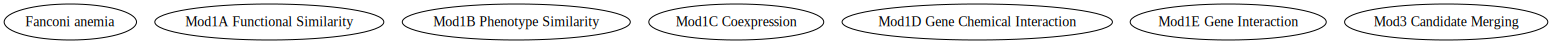

In [17]:
from GraphVisuals.graphviz_wrapper import PathGraph

# instantiate workflow graph
path_graph = PathGraph(input_curie=input_object['id'], input_label=input_object['label'])
path_graph.load_nodes(node_list=worklow_modules)
path_graph.path_graph

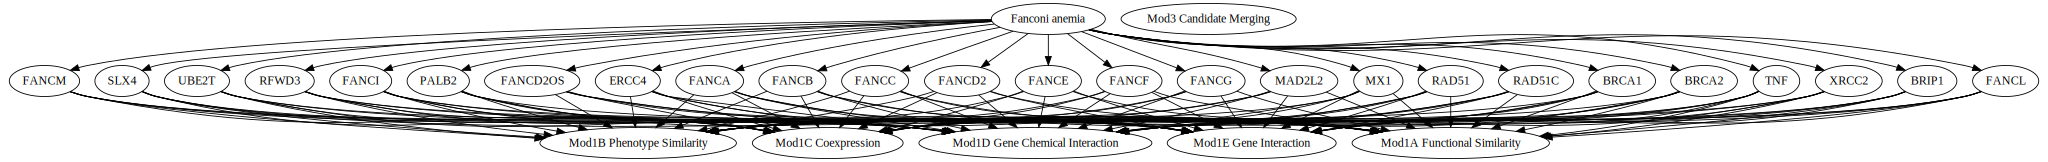

In [18]:
# graph fanconi genes 2 mod1
path_graph.load_nodes(list(zip(disease_associated_genes['hit_id'], disease_associated_genes['hit_label'])))
path_graph.module_outputs(output_gene_set=input_curie_set, module_id=path_graph.conv_pref(input_disease))
for module in worklow_modules[:-1]:
    path_graph.module_inputs(input_gene_set=input_curie_set, module_id=module[0])
path_graph.path_graph

In [19]:
# start a list of final candidates from each module
mod1_candidates = list()

# Mod1A Functional Similarity
## Find similar genes based on GO functional annotations using OntoBio Jaccard similarity

In [20]:
from Modules.Mod1A_functional_sim import FunctionalSimilarity

# Module specification
mod1a_config = {
    'input': input_curie_set,
    'input_type': {
        'complexity': 'set',
        'id_type': 'HGNC', 
        'data_type': 'gene',
    },
    'output_type': {
        'complexity': 'set',
        'id_type': 'HGNC',
        'data_type': 'gene',
    },
    'parameters': {
        'taxon': 'human',
        'threshold': 0.7,
    },
    
    'source': 'Monarch Biolink',
    'predicate': ['blm:macromolecular machine to biological process association', 
                  'macromolecular machine to molecular activity association']
} 


func_sim = FunctionalSimilarity()
func_sim.load_gene_set(mod1a_config['input']) 
func_sim.load_associations() 
Mod1A_results = pd.DataFrame(func_sim.compute_similarity(lower_bound=mod1a_config['parameters']['threshold']))  
Mod1A_results = Mod1A_results[~Mod1A_results['sim_hit_name'].isin(disease_associated_genes['hit_label'])]
Mod1A_results

/Users/tputman/.virtualenvs/modules/lib/python3.6/site-packages/cachier/mongo_core.py:24: UserWarning: Cachier warning: pymongo was not found. MongoDB cores will not work.
  "Cachier warning: pymongo was not found. MongoDB cores will not work.")


,input_curie,sim_hit_curie,sim_hit_name,sim_score
8,HGNC:23845,UniProtKB:Q9BQ83,SLX1A,0.760638
16,HGNC:3583,UniProtKB:Q0VG06,FAAP100,0.810345
18,HGNC:3583,UniProtKB:Q9BTP7,FAAP24,0.903846
21,HGNC:3583,UniProtKB:Q9NRY2,INIP,0.862745
25,HGNC:3586,UniProtKB:Q0VG06,FAAP100,0.775862
27,HGNC:3586,UniProtKB:Q9BTP7,FAAP24,0.865385
30,HGNC:3586,UniProtKB:Q9NRY2,INIP,0.823529
31,HGNC:3587,UniProtKB:Q0VG06,FAAP100,0.810345
33,HGNC:3587,UniProtKB:Q9BTP7,FAAP24,0.903846
36,HGNC:3587,UniProtKB:Q9NRY2,INIP,0.862745


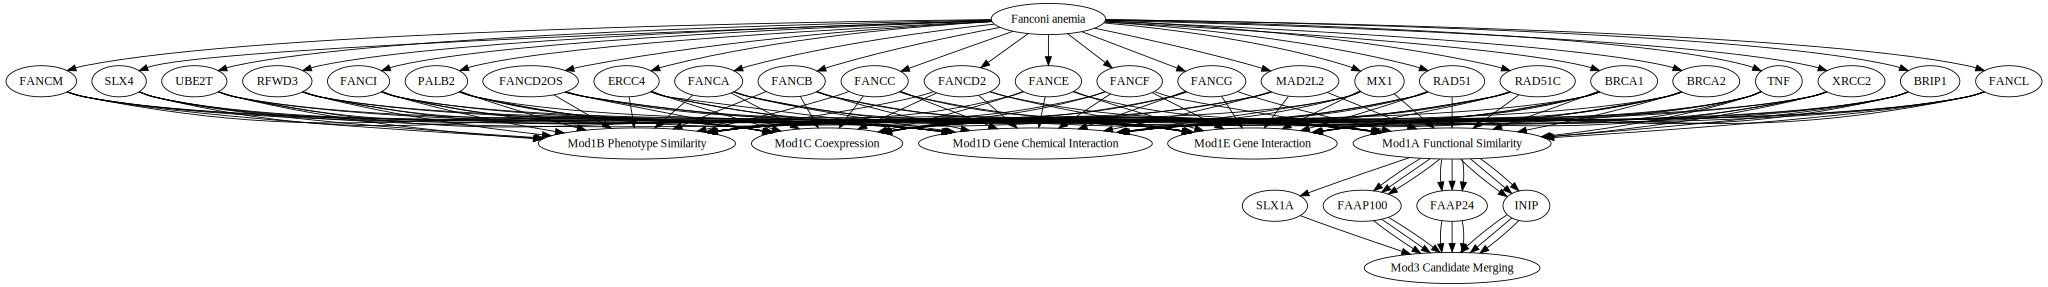

In [21]:
# graph mod1A genes 2 Mod3
for index, row in Mod1A_results.iterrows():
    mod1_candidates.append({
        'input_curie': row[0],
        'output_curie': row[1],
        'output_name': row[2],
        'module': 'Mod1A'
    }) 
path_graph.load_nodes(list(zip(Mod1A_results['sim_hit_curie'], Mod1A_results['sim_hit_name'])))
path_graph.module_inputs(input_gene_set=Mod1A_results['sim_hit_curie'].tolist(), module_id='Mod3')
path_graph.module_outputs(output_gene_set=Mod1A_results['sim_hit_curie'].tolist(), module_id='Mod1A')
path_graph.path_graph

# Mod1B Phenotype Similarity
## Find similar genes based on OwlSim calculated Phenotype Similarity

In [23]:
from Modules.Mod1B_phenotype_similarity import PhenotypeSimilarity

# Module specification
mod1b_config = {
    'input': input_curie_set,
    'input_type': {
        'complexity': 'set',
        'id_type': 'HGNC',
        'data_type': 'gene',
    },
    'output_type': {
        'complexity': 'set',
        'id_type': 'HGNC',
        'data_type': 'gene',
    },
    'parameters': {
        'taxon': 'human',
        'threshold': 100,
    },
    'source': 'Monarch Biolink',
    'predicate': ['blm:has phenotype']
}

pheno_sim = PhenotypeSimilarity()
pheno_sim.load_gene_set(mod1b_config['input'])
pheno_sim.load_associations()
Mod1B_results = pheno_sim.similarity_search()

'label' <SimSearch.simsearch_client.SimScoreMatch object at 0x12fd469b0>


NameError: name 'input_genes_df' is not defined

In [24]:
Mod1B_results = Mod1B_results[~Mod1B_results['label_x'].isin(disease_associated_genes['hit_label'])]
Mod1B_results = Mod1B_results[~Mod1B_results['id'].str.contains('MONDO')]
Mod1B_results = Mod1B_results[Mod1B_results['summed_score'] > 100]
Mod1B_results['hit_id'] = Mod1B_results['id'].apply(map_id)
Mod1B_results

,input_id_x,id,label_x,summed_score,hit_id
24,HGNC:1100,OMIM:600020,MXI1,144.0,HGNC:7534
26,HGNC:1100,OMIM:605650,POLK,144.0,HGNC:9183
27,HGNC:1100,OMIM:602053,KLF6,144.0,HGNC:2235
29,HGNC:1100,OMIM:602650,SPOP,144.0,HGNC:11254
30,HGNC:1100,OMIM:602686,MAD1L1,144.0,HGNC:6762
31,HGNC:1100,OMIM:313700,AR,142.0,HGNC:644
33,HGNC:1100,OMIM:153622,MSR1,144.0,HGNC:7376
59,HGNC:1100,OMIM:171834,PIK3CA,140.0,HGNC:8975
72,HGNC:1100,OMIM:191170,TP53,138.0,HGNC:11998
93,HGNC:1100,OMIM:604610,BLM,128.0,HGNC:1058


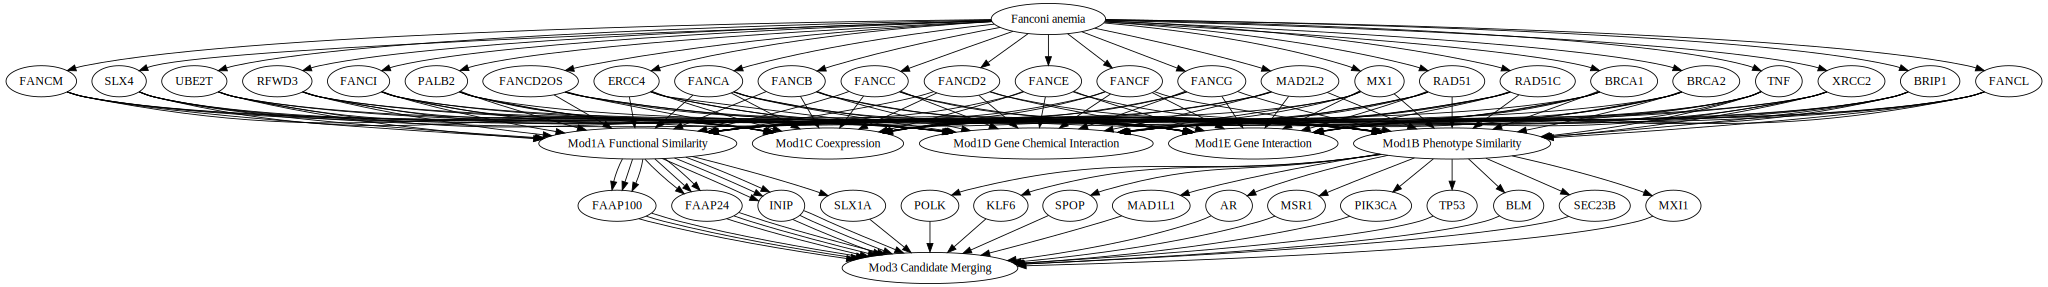

In [25]:
# graph mod1B genes 2 Mod3
for index, row in Mod1B_results.iterrows():
    mod1_candidates.append({
        'input_curie': row[0],
        'output_curie': row[-1],
        'output_name': row[2],
        'module': 'Mod1B'
    }) 
path_graph.load_nodes(list(zip(Mod1B_results['hit_id'], Mod1B_results['label_x'])))
path_graph.module_outputs(output_gene_set=Mod1B_results['hit_id'].tolist(), module_id='Mod1B')
path_graph.module_inputs(input_gene_set=Mod1B_results['hit_id'].tolist(), module_id='Mod3')
path_graph.path_graph

# Mod1C Coexpression

In [ ]:
# TODO

# Mod1D Chemical Gene Interactions

In [ ]:
# Needs work, way too many hits 

In [ ]:
# increases expression instance
# from Modules.Mod1D_Chemical_Gene import ChemicalGeneInteractions

In [ ]:
# use only fa core genes 
# fa_core_genes = ['FANCA','FANCB','FANCC','FANCE','FANCF','FANCG','FANCL','FANCM','FANCD2','FANCI','UBE2T','SLX4']
# fa_genes_df[fa_genes_df['hit_label'].str.contains('|'.join(fa_core_genes))]

In [ ]:
# gci = ChemicalGeneInteractions()
# gci.load_gene_set(gene_set=fa_genes_df[fa_genes_df['hit_label'].str.contains('|'.join(fa_core_genes))])
# only return chemicals that decrease expression of fa genes
# gci.get_chemicals(action='decreases^expression')
# gci.load_gene_hits(action='decreases^expression', rows=2)

# Mod1E Gene Interactions

In [26]:
from Modules.Mod1E_interactions import GeneInteractions

# Module specification
mod1e_config = {
    'input': input_curie_set,
    'input_type': {
        'complexity': 'set',
        'id_type': 'HGNC',
        'data_type': 'gene',
    },
    'output_type': {
        'complexity': 'set',
        'id_type': 'HGNC',
        'data_type': 'gene',
    },
    'parameters': {
        'taxon': 'human',
        'threshold': None,
    },
    'source': 'Monarch Biolink',
    'predicate': ['blm:interacts with']
}

gene_inter = GeneInteractions()
gene_inter.load_gene_set(gene_set=mod1e_config['input'])
gene_inter.get_interactions()
Mod1E_results = pd.DataFrame(gene_inter.interactions)

In [29]:
Mod1E_results = Mod1E_results[~Mod1E_results['hit_label'].isin(disease_associated_genes['hit_label'])]

In [30]:
grouped_Mod1E_results = Mod1E_results.groupby(['hit_id','hit_label'])['input_id'].apply(', '.join).reset_index()

In [31]:
trimmed_Mod1E_results = list()
for index, row in grouped_Mod1E_results.iterrows():
    if len(row[-1].split(',')) > 1:
        trimmed_Mod1E_results.append(row)
Mod1E_results = pd.DataFrame(trimmed_Mod1E_results, columns=['hit_id', 'hit_label', 'input_id'])
Mod1E_results   

,hit_id,hit_label,input_id
4,HGNC:10067,RNF4,"HGNC:25009, HGNC:3582"
7,HGNC:10289,RPA1,"HGNC:1101, HGNC:12829, HGNC:20748, HGNC:23168,..."
8,HGNC:10290,RPA2,"HGNC:1100, HGNC:1101, HGNC:12829, HGNC:20473, ..."
9,HGNC:10291,RPA3,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
14,HGNC:10417,RPS27A,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
22,HGNC:1058,BLM,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
30,HGNC:10845,SEM1,"HGNC:1101, HGNC:11892, HGNC:9817"
37,HGNC:11098,SMARCA2,"HGNC:9817, HGNC:9820"
38,HGNC:11100,SMARCA4,"HGNC:3582, HGNC:9817, HGNC:9820"
45,HGNC:1116,BSG,"HGNC:3582, HGNC:9820"


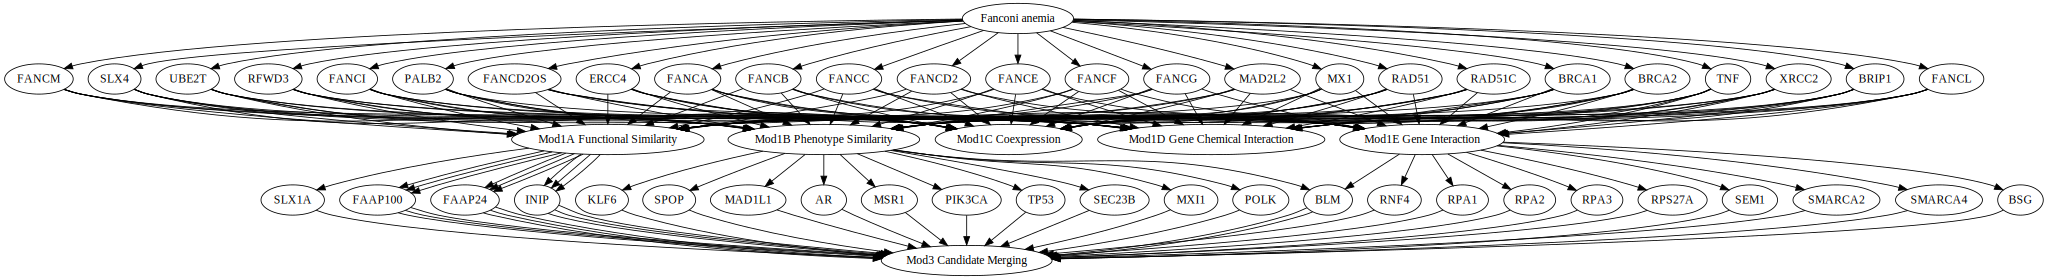

In [32]:
# graph mod1E genes 2 Mod3
for index, row in Mod1E_results.iterrows():
    mod1_candidates.append({
        'input_curie': row[-1],
        'output_curie': row[0],
        'output_name': row[1],
        'module': 'Mod1E',
    })

path_graph.load_nodes(list(zip(Mod1E_results['hit_id'], Mod1E_results['hit_label']))[:10])
path_graph.module_outputs(output_gene_set=Mod1E_results['hit_id'].tolist()[:10], module_id='Mod1E')
path_graph.module_inputs(input_gene_set=Mod1E_results['hit_id'].tolist()[:10], module_id='Mod3')
path_graph.path_graph

In [33]:
candidates_df = pd.DataFrame(mod1_candidates)

In [34]:
candidates_df

,input_curie,module,output_curie,output_name
0,HGNC:23845,Mod1A,UniProtKB:Q9BQ83,SLX1A
1,HGNC:3583,Mod1A,UniProtKB:Q0VG06,FAAP100
2,HGNC:3583,Mod1A,UniProtKB:Q9BTP7,FAAP24
3,HGNC:3583,Mod1A,UniProtKB:Q9NRY2,INIP
4,HGNC:3586,Mod1A,UniProtKB:Q0VG06,FAAP100
5,HGNC:3586,Mod1A,UniProtKB:Q9BTP7,FAAP24
6,HGNC:3586,Mod1A,UniProtKB:Q9NRY2,INIP
7,HGNC:3587,Mod1A,UniProtKB:Q0VG06,FAAP100
8,HGNC:3587,Mod1A,UniProtKB:Q9BTP7,FAAP24
9,HGNC:3587,Mod1A,UniProtKB:Q9NRY2,INIP


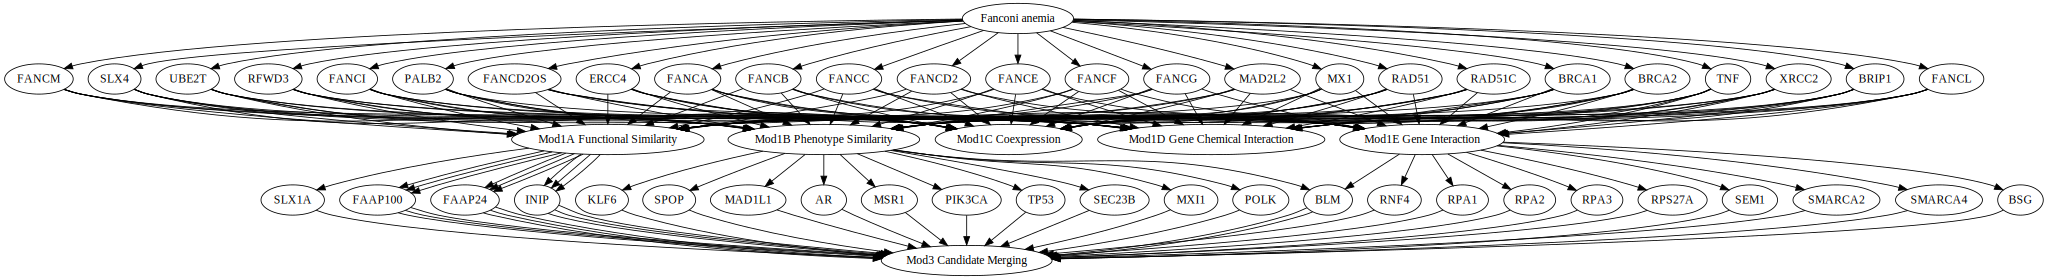

In [35]:
path_graph.path_graph

In [36]:
[mg.query('symbol:{}'.format(x), species='human')['hits'][0]['entrezgene'] for x in set(candidates_df['output_name'].tolist())]

['5893',
 '84057',
 '5965',
 '83695',
 '5395',
 '199990',
 '6233',
 '7507',
 '9817',
 '4255',
 '699',
 '51582',
 '255626',
 '7415',
 '64858',
 '10714',
 '3337',
 '7469',
 '51750',
 '10524',
 '4437',
 '8405',
 '8340',
 '5610',
 '84126',
 '4436',
 '5422',
 '25920',
 '5884',
 '23514',
 '3183',
 '3437',
 '3329',
 '7316',
 '23047',
 '51659',
 '348654',
 '387521',
 '23291',
 '8348',
 '10482',
 '2294',
 '375757',
 '345757',
 '55284',
 '4914',
 '85236',
 '3018',
 '1994',
 '128710',
 '7706',
 '147719',
 '5378',
 '5983',
 '8379',
 '5290',
 '80198',
 '1022',
 '2064',
 '7203',
 '8940',
 '6790',
 '1107',
 '991',
 '51514',
 '2073',
 '10635',
 '27301',
 '701',
 '6996',
 '3570',
 '682',
 '8345',
 '7184',
 '1763',
 '2963',
 '113510',
 '823',
 '2071',
 '4173',
 '5984',
 '27033',
 '27120',
 '10',
 '641',
 '5932',
 '7157',
 '904',
 '2994',
 '10935',
 '79184',
 '7189',
 '8535',
 '4481',
 '119392',
 '7329',
 '5433',
 '91442',
 '10111',
 '9400',
 '11065',
 '5890',
 '1062',
 '9319',
 '5689',
 '259266',
 '5595

In [37]:
path_graph.path_graph.render()

'Workflow II Fanconi anemia Implementation.gv.pdf'